In [0]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
vocab_size = 1000
embedding_dimention = 16
max_length = 32
trunc_type = "post"
padding_type = "post"
oov_tok = "<OOV>"
training_size = 20000

In [0]:
!wget "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json" 

--2019-07-05 19:22:53--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 2404:6800:4008:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json.7’

sarcasm.json.7      100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2019-07-05 19:22:53 (145 MB/s) - ‘sarcasm.json.7’ saved [5643545/5643545]



In [0]:
with open("sarcasm.json","r") as f:
  datastore = json.load(f)

In [0]:
datastore

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [0]:
sentances = []
labels = []

for i in datastore:
  sentances.append(i["headline"])
  labels.append(i["is_sarcastic"])

In [0]:
sentances

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way',
 "advancing the world's women",
 'the fascinating case for eating lab-grown meat',
 'this ceo will send your kids to school, if you work for his company',
 'top snake handler leaves sinking huckabee campaign',
 "friday's morning email: inside trump's presser for the ages",
 'airline passengers tackle man who rushes cockpit in bomb threat',
 'facebook reportedly working on healthcare features and apps',
 "north korea praises trump and urges us voters to reject 'dull hillary'",
 "actually, cnn's jeffrey lord has been 'indefensible' for a while",
 'barcelona holds huge protest in su

In [0]:
labels

[0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,


In [0]:
training_sentences = sentances[0:training_size]  #0 to 2000
testing_sentences = sentances[training_size:] # 2000 to end 

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [0]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)


In [0]:
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [0]:
training_sequence = tokenizer.texts_to_sequences(training_sentences)
training_padd = pad_sequences(training_sequence,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [0]:
testing_sequence = tokenizer.texts_to_sequences(testing_sentences)
testing_padd = pad_sequences(testing_sequence,maxlen=max_length,padding=padding_type,truncating=trunc_type)


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dimention,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

W0705 19:22:57.330605 140446288422784 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0705 19:22:57.336548 140446288422784 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

W0705 19:22:57.464694 140446288422784 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 16,433
Trainable params: 16,433
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs = 30

history = model.fit(training_padd,training_labels,epochs=num_epochs,validation_data=(testing_padd,testing_labels),verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 3s - loss: 0.5872 - acc: 0.6869 - val_loss: 0.4509 - val_acc: 0.7973
Epoch 2/30
20000/20000 - 3s - loss: 0.4027 - acc: 0.8176 - val_loss: 0.4055 - val_acc: 0.8143
Epoch 3/30
20000/20000 - 3s - loss: 0.3721 - acc: 0.8310 - val_loss: 0.3997 - val_acc: 0.8158
Epoch 4/30
20000/20000 - 3s - loss: 0.3616 - acc: 0.8346 - val_loss: 0.4036 - val_acc: 0.8097
Epoch 5/30
20000/20000 - 3s - loss: 0.3561 - acc: 0.8374 - val_loss: 0.4013 - val_acc: 0.8114
Epoch 6/30
20000/20000 - 3s - loss: 0.3536 - acc: 0.8393 - val_loss: 0.4025 - val_acc: 0.8168
Epoch 7/30
20000/20000 - 3s - loss: 0.3519 - acc: 0.8411 - val_loss: 0.4055 - val_acc: 0.8111
Epoch 8/30
20000/20000 - 3s - loss: 0.3504 - acc: 0.8419 - val_loss: 0.4035 - val_acc: 0.8137
Epoch 9/30
20000/20000 - 3s - loss: 0.3492 - acc: 0.8400 - val_loss: 0.4059 - val_acc: 0.8119
Epoch 10/30
20000/20000 - 3s - loss: 0.3480 - acc: 0.8425 - val_loss: 0.4040 - val_acc: 0.8138
Epoch 11/3

In [0]:
import matplotlib.pyplot as plt

In [0]:
def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,"val_"+string])
  plt.show()

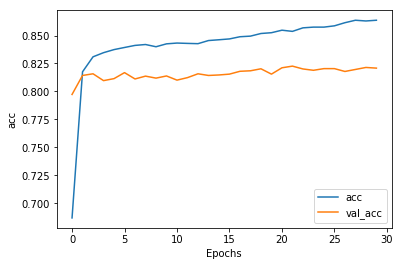

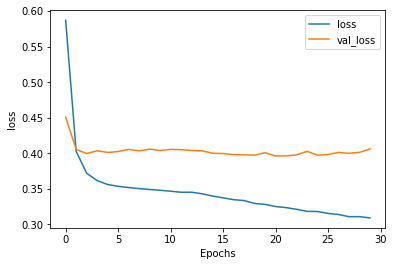

In [0]:
plot_graphs(history,"acc")
plot_graphs(history,"loss")

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [0]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1000, 16)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:


try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [0]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences(sentence)
print(sequence)

[[88], [], [1], [1], [7], [1], [1], [1], [], [632], [1], [88], [1], [672], [], [632], [1], [88], [54], [], [88], [54], [], [7], [1], [7], [1], [88], [1], [1], [], [], [1], [1], [1], [1], [54], [632], []]
